In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install ktrain

     |████████████████████████████████| 25.2 MB 8.3 MB/s 
     |████████████████████████████████| 981 kB 9.6 MB/s 
     |████████████████████████████████| 242 kB 10.3 MB/s 
     |████████████████████████████████| 1.1 MB 10.1 MB/s 
     |████████████████████████████████| 468 kB 10.4 MB/s 
     |████████████████████████████████| 496 kB 10.4 MB/s 
     |████████████████████████████████| 3.0 MB 10.7 MB/s 
  Created wheel for ktrain: filename=ktrain-0.22.3-py3-none-any.whl size=25271838 sha256=57ce66fe2640bd3422c462be621ff61fb4cd27cc34d64f1de45d3b1cb9365eae
  Stored in directory: /root/.cache/pip/wheels/f0/9d/12/8b9aac97fd06b918042bef6b969413697b70164945df5122f8
  Created wheel for keras-bert: filename=keras_bert-0.86.0-py3-none-any.whl size=34147 sha256=f804eda9764d3ed3ccb2e0956ed42cef7cbba50a021d4ec4cbb2e4bbed0696f2
  Stored in directory: /root/.cache/pip/wheels/fc/c1/0a/eb9187261b3f192ac314aefb54fe66f50540c3edb906599633
  Created wheel for langdetect: filename=langdetect-1.0.8-py3-none-a

In [3]:
import ktrain
from ktrain import text

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [4]:
categories = ['alt.atheism', 'soc.religion.christian',
             'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups

train_b = fetch_20newsgroups(subset='train',
   categories=categories, shuffle=True, random_state=42)
test_b = fetch_20newsgroups(subset='test',
   categories=categories, shuffle=True, random_state=42)

In [5]:
train_b.data[0]

'From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n'

In [6]:
print('size of training set: %s' % (len(train_b['data'])))
print('size of validation set: %s' % (len(test_b['data'])))
print('classes: %s' % (train_b.target_names))

size of training set: 2257
size of validation set: 1502
classes: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']


In [7]:
x_train = train_b.data
y_train = train_b.target
x_test = test_b.data
y_test = test_b.target

In [8]:
train, val, preprocess = text.texts_from_array(x_train=x_train, y_train=y_train,
                                          x_test=x_test, y_test=y_test,
                                          class_names=train_b.target_names,
                                          preprocess_mode='distilbert',
                                          maxlen=400)


preprocessing train...
language: en
train sequence lengths:
	mean : 308
	95percentile : 837
	99percentile : 1938


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 343
	95percentile : 979
	99percentile : 2562


task: text classification


In [9]:
model = text.text_classifier('distilbert', train_data=train, preproc=preprocess)

Is Multi-Label? False
maxlen is 400



done.


In [10]:
learner = ktrain.get_learner(model, train_data=train, val_data=val, batch_size=6)

Only for info max_epochs is set to be 1.

simulating training for different learning rates... this may take a few moments...
376/376 [==============================] - 74s 196ms/step - loss: 343.5084 - accuracy: 0.4020


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


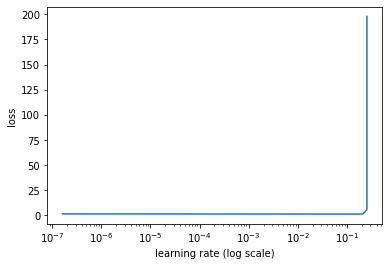

In [11]:
learner.lr_find(max_epochs=1)
learner.lr_plot()

In [12]:
learner.fit_onecycle(3e-5, 3)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/3
377/377 [==============================] - 88s 234ms/step - loss: 0.6291 - accuracy: 0.8148 - val_loss: 0.2174 - val_accuracy: 0.9387
Epoch 2/3
377/377 [==============================] - 87s 231ms/step - loss: 0.1295 - accuracy: 0.9632 - val_loss: 0.2745 - val_accuracy: 0.9201
Epoch 3/3
377/377 [==============================] - 87s 231ms/step - loss: 0.0449 - accuracy: 0.9885 - val_loss: 0.1699 - val_accuracy: 0.9521


In [13]:
p = ktrain.get_predictor(learner.model, preprocess)

In [14]:
p.predict("There is a problem with my computer monitor's resolution.  Everything is blurry.")

'comp.graphics'